In [2]:
%load_ext autoreload
%autoreload 2
from sklearn import tree
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import functions


In [3]:
target_a = 'TARGET_BAD_FLAG'
target_b = 'IMP_TARGET_LOSS_AMT'


In [5]:
df = functions.clean_df(file_path= '../../data_sets/SA_clean_HMEQ_Loss.csv', remove_cols=['z_JOB', 'z_REASON'])

In [6]:
display(df.head(), df.columns)

,TARGET_BAD_FLAG,IMP_TARGET_LOSS_AMT,IMP_LOAN,flag_LOAN,IMP_MORTDUE,flag_MORTDUE,IMP_VALUE,flag_VALUE,IMP_YOJ,flag_YOJ,...,IMP_CLNO,flag_CLNO,IMP_DEBTINC,flag_DEBTINC,z_JOB_Office,z_JOB_Other,z_JOB_ProfExe,z_JOB_Sales,z_JOB_Self,z_REASON_HomeImp
0,1,641.0,1100,0,25860.0,0,39025.0,0,10.5,0,...,9.0,0,34.818262,1,0,1,0,0,0,1
1,1,1109.0,1300,0,70053.0,0,68400.0,0,7.0,0,...,14.0,0,34.818262,1,0,1,0,0,0,1
2,1,767.0,1500,0,13500.0,0,16700.0,0,4.0,0,...,10.0,0,34.818262,1,0,1,0,0,0,1
3,1,1425.0,1500,0,65019.0,1,89235.5,1,7.0,1,...,20.0,1,34.818262,1,0,1,0,0,0,0
4,0,0.0,1700,0,97800.0,0,112000.0,0,3.0,0,...,14.0,0,34.818262,1,1,0,0,0,0,1


Index(['TARGET_BAD_FLAG', 'IMP_TARGET_LOSS_AMT', 'IMP_LOAN', 'flag_LOAN',
       'IMP_MORTDUE', 'flag_MORTDUE', 'IMP_VALUE', 'flag_VALUE', 'IMP_YOJ',
       'flag_YOJ', 'IMP_DEROG', 'flag_DEROG', 'IMP_DELINQ', 'flag_DELINQ',
       'IMP_CLAGE', 'flag_CLAGE', 'IMP_NINQ', 'flag_NINQ', 'IMP_CLNO',
       'flag_CLNO', 'IMP_DEBTINC', 'flag_DEBTINC', 'z_JOB_Office',
       'z_JOB_Other', 'z_JOB_ProfExe', 'z_JOB_Sales', 'z_JOB_Self',
       'z_REASON_HomeImp'],
      dtype='object')

## Splitting into train and test 

In [7]:
train_cols = list(df.columns.difference((target_a, target_b)))
x_train, x_test, y_train, y_test = functions.split_df(df = df.copy(), train_cols=train_cols, 
test_cols = [target_a, target_b], test_size=0.2, rand_seed=1)

In [8]:
display(x_train, x_test, y_train, y_test )

,IMP_CLAGE,IMP_CLNO,IMP_DEBTINC,IMP_DELINQ,IMP_DEROG,IMP_LOAN,IMP_MORTDUE,IMP_NINQ,IMP_VALUE,IMP_YOJ,...,flag_MORTDUE,flag_NINQ,flag_VALUE,flag_YOJ,z_JOB_Office,z_JOB_Other,z_JOB_ProfExe,z_JOB_Sales,z_JOB_Self,z_REASON_HomeImp
5292,114.666667,12.0,34.818262,6.0,0.0,29000,72478.0,4.0,113000.0,1.5,...,0,0,0,0,0,1,0,0,0,0
1162,121.733333,23.0,34.818262,1.0,0.0,10000,34767.0,0.0,51000.0,23.0,...,0,0,0,0,0,1,0,0,0,1
2355,255.687648,41.0,38.746760,0.0,0.0,14200,100664.0,2.0,129166.0,4.0,...,0,0,0,0,0,0,0,0,0,0
3620,175.500000,16.0,34.818262,0.0,0.0,19000,57429.0,1.0,86250.0,5.0,...,0,1,0,0,1,0,0,0,0,0
1247,100.629664,34.0,37.361514,0.0,0.0,10200,77571.0,0.0,102732.0,6.0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,113.257509,28.0,27.347597,2.0,5.0,9000,90969.0,5.0,108606.0,5.0,...,0,0,0,0,0,0,0,0,0,1
5192,146.141930,30.0,39.759850,0.0,1.0,28000,62376.0,0.0,104073.0,16.0,...,0,0,0,0,0,1,0,0,0,0
3980,412.014873,23.0,21.945849,0.0,0.0,20800,65019.0,0.0,78483.0,2.0,...,1,0,0,0,0,0,0,1,0,0
235,136.632944,30.0,32.050023,0.0,0.0,5400,68625.0,0.0,82304.0,2.0,...,0,0,0,0,0,0,0,1,0,0


,IMP_CLAGE,IMP_CLNO,IMP_DEBTINC,IMP_DELINQ,IMP_DEROG,IMP_LOAN,IMP_MORTDUE,IMP_NINQ,IMP_VALUE,IMP_YOJ,...,flag_MORTDUE,flag_NINQ,flag_VALUE,flag_YOJ,z_JOB_Office,z_JOB_Other,z_JOB_ProfExe,z_JOB_Sales,z_JOB_Self,z_REASON_HomeImp
4146,165.600830,43.0,38.014917,4.0,2.0,21600,154991.0,0.0,89235.5,7.0,...,0,0,1,1,0,0,0,0,1,0
4103,314.984287,17.0,43.103002,0.0,0.0,21400,143151.0,0.0,185014.0,7.0,...,0,0,0,0,0,0,0,0,0,1
5439,116.729746,5.0,37.999082,0.0,0.0,32200,16232.0,1.0,60238.0,0.0,...,0,0,0,0,0,1,0,0,0,0
997,350.639006,46.0,30.061371,0.0,0.0,9400,76989.0,0.0,88788.0,24.0,...,0,0,0,0,0,1,0,0,0,1
5908,116.906104,11.0,43.368718,1.0,0.0,65100,67389.0,0.0,142740.0,9.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4171,165.310282,37.0,20.342811,0.0,0.0,21700,128841.0,0.0,172954.0,4.0,...,0,0,0,0,0,0,1,0,0,0
100,63.933333,15.0,34.818262,2.0,1.0,4100,58500.0,2.0,65000.0,8.0,...,0,0,0,0,0,1,0,0,0,1
5164,95.043074,13.0,20.209038,0.0,1.0,27700,65019.0,1.0,42515.0,11.0,...,1,1,0,0,0,1,0,0,0,0
5208,302.803261,23.0,36.390474,0.0,0.0,28200,76011.0,0.0,129352.0,1.0,...,0,0,0,0,1,0,0,0,0,0


,TARGET_BAD_FLAG,IMP_TARGET_LOSS_AMT
5292,1,31053.0
1162,0,0.0
2355,0,0.0
3620,0,0.0
1247,0,0.0
...,...,...
905,1,8501.0
5192,0,0.0
3980,0,0.0
235,0,0.0


,TARGET_BAD_FLAG,IMP_TARGET_LOSS_AMT
4146,1,23515.0
4103,0,0.0
5439,0,0.0
997,0,0.0
5908,0,0.0
...,...,...
4171,0,0.0
100,1,4003.0
5164,0,0.0
5208,0,0.0


## Decision Tree

In [9]:
#classification model for predicting defaults

In [10]:
#1- building the decision tree
fm01_tree = tree.DecisionTreeClassifier(max_depth=5)
fm01_tree = fm01_tree.fit(x_train, y_train[target_a])

In [11]:
#predicting on train and test
fm01_tree_pred_train = fm01_tree.predict(x_train)
fm01_tree_pred_test= fm01_tree.predict(x_test)

In [12]:
#checking accuracy predictions
print('Train Accuracy:', metrics.accuracy_score(y_train[target_a],fm01_tree_pred_train),'\n',
'Test Accuracy:',  metrics.accuracy_score(y_test[target_a],fm01_tree_pred_test))

Train Accuracy: 0.8974412751677853 
 Test Accuracy: 0.889261744966443


In [13]:
text_representation = tree.export_text(fm01_tree, feature_names=list(x_train.columns))
print(text_representation)

|--- flag_DEBTINC <= 0.50
|   |--- IMP_DEBTINC <= 44.67
|   |   |--- IMP_DELINQ <= 4.50
|   |   |   |--- flag_VALUE <= 0.50
|   |   |   |   |--- IMP_DEROG <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- IMP_DEROG >  1.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- flag_VALUE >  0.50
|   |   |   |   |--- flag_YOJ <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- flag_YOJ >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- IMP_DELINQ >  4.50
|   |   |   |--- flag_DEROG <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- flag_DEROG >  0.50
|   |   |   |   |--- class: 0
|   |--- IMP_DEBTINC >  44.67
|   |   |--- IMP_CLAGE <= 299.90
|   |   |   |--- IMP_CLAGE <= 234.72
|   |   |   |   |--- class: 1
|   |   |   |--- IMP_CLAGE >  234.72
|   |   |   |   |--- IMP_DEBTINC <= 46.35
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- IMP_DEBTINC >  46.35
|   |   |   |   |   |--- class: 1
|   |   |--- IMP_CLAGE >  299.90
|   |   |   |--- IMP_LOAN <= 20300

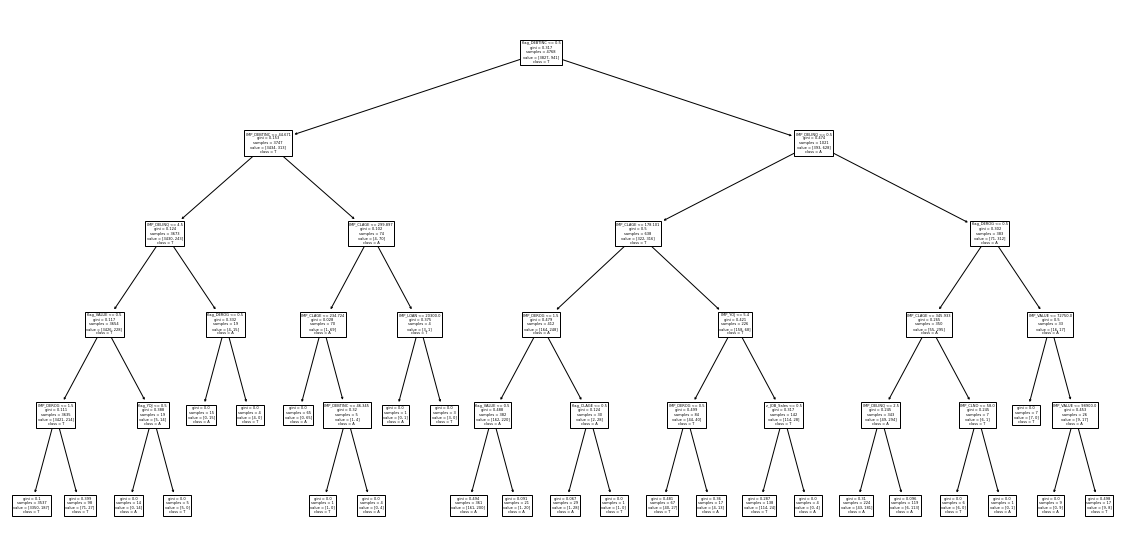

In [14]:
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(fm01_tree, 
                   feature_names=list(x_train.columns),  
                   class_names=target_a,
                   filled=False)
plt.savefig('decision_tree', dpi=500)


In [15]:
#extracting probabi;ities
tree_prob_train= fm01_tree.predict_proba(x_train)
tree_prob_test= fm01_tree.predict_proba(x_test)

#keeping prob of default only
tree_p1_train= tree_prob_train[:,1]
tree_p1_test= tree_prob_test[:,1]

In [16]:
#developing ROC curve
tree_fpr_train, tree_tpr_train, threshold_train = metrics.roc_curve(y_train[target_a], tree_p1_train)
tree_fpr_test, tree_tpr_test, threshold_test = metrics.roc_curve(y_test[target_a], tree_p1_test)

#AUC
tree_roc_auc_train = metrics.auc(tree_fpr_train,tree_tpr_train )
tree_roc_auc_test = metrics.auc(tree_fpr_test,tree_tpr_test)

c:\Users\salma\OneDrive\Desktop\Salma\NW\practical_machine_learning\Code\Module_2\functions.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr_test, tpr_test, 'b', label = f'AUC TEST:{roc_auc_test}', color="red")


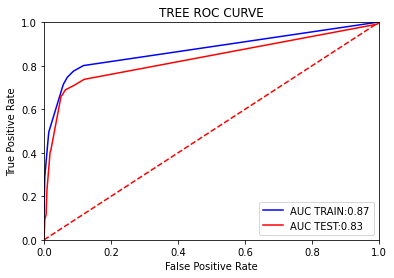

In [27]:
#plotting ROC curve 
functions.plot_roc(fpr_train= tree_fpr_train,tpr_train= tree_tpr_train, fpr_test= tree_fpr_test,
         tpr_test= tree_tpr_test, roc_auc_train= tree_roc_auc_train, roc_auc_test= tree_roc_auc_test )

In [28]:
#extracting variables and importance

dict(zip(x_train.columns, fm01_tree.feature_importances_))


{'IMP_CLAGE': 0.04940247794989317,
 'IMP_CLNO': 0.0022332192849658697,
 'IMP_DEBTINC': 0.1483703097867694,
 'IMP_DELINQ': 0.09367247300833814,
 'IMP_DEROG': 0.026195655570476813,
 'IMP_LOAN': 0.0019540668743451358,
 'IMP_MORTDUE': 0.0,
 'IMP_NINQ': 0.0,
 'IMP_VALUE': 0.010440266984023446,
 'IMP_YOJ': 0.010704557635106107,
 'flag_CLAGE': 0.0023478749877189095,
 'flag_CLNO': 0.0,
 'flag_DEBTINC': 0.5906622257239083,
 'flag_DELINQ': 0.0,
 'flag_DEROG': 0.01666544886074987,
 'flag_LOAN': 0.0,
 'flag_MORTDUE': 0.0,
 'flag_NINQ': 0.0,
 'flag_VALUE': 0.030840869270040153,
 'flag_YOJ': 0.009598924996783121,
 'z_JOB_Office': 0.0,
 'z_JOB_Other': 0.0,
 'z_JOB_ProfExe': 0.0,
 'z_JOB_Sales': 0.00691162906688152,
 'z_JOB_Self': 0.0,
 'z_REASON_HomeImp': 0.0}

## Decision Trees for Regression

In [29]:
#Filtering the train and test splits only on values with amount > 0 
#in clean up steps, missing amounts were filled with 0s...
#there were no zeros in the column prior to that
reg_y_train = y_train[y_train[target_a]==1]
reg_y_test = y_test[y_test[target_a]==1]
#subsetting based on index
reg_x_train =x_train[x_train.index.isin(reg_y_train.index)]  
reg_x_test = x_test[x_test.index.isin(reg_y_test.index)] 

display (reg_y_train.head(), reg_y_test.head(), reg_x_train.head(),
         reg_x_test.head(), (reg_y_train.index == reg_x_train.index).all(),
        (reg_y_test.index == reg_x_test.index).all() )

,TARGET_BAD_FLAG,IMP_TARGET_LOSS_AMT
5292,1,31053.0
3573,1,3813.0
5567,1,12400.0
1735,1,10997.0
5818,1,50909.0


,TARGET_BAD_FLAG,IMP_TARGET_LOSS_AMT
4146,1,23515.0
3263,1,18572.0
5181,1,27894.0
308,1,6491.0
2049,1,12418.0


,IMP_CLAGE,IMP_CLNO,IMP_DEBTINC,IMP_DELINQ,IMP_DEROG,IMP_LOAN,IMP_MORTDUE,IMP_NINQ,IMP_VALUE,IMP_YOJ,...,flag_MORTDUE,flag_NINQ,flag_VALUE,flag_YOJ,z_JOB_Office,z_JOB_Other,z_JOB_ProfExe,z_JOB_Sales,z_JOB_Self,z_REASON_HomeImp
5292,114.666667,12.0,34.818262,6.0,0.0,29000,72478.0,4.0,113000.0,1.5,...,0,0,0,0,0,1,0,0,0,0
3573,135.951808,11.0,47.590529,0.0,0.0,18800,67666.0,1.0,167619.0,14.0,...,0,0,0,0,0,0,1,0,0,1
5567,152.245428,25.0,21.862939,0.0,0.0,36100,233417.0,0.0,324987.0,4.0,...,0,0,0,0,0,0,1,0,0,1
1735,173.466667,20.0,34.818262,0.0,0.0,12000,65019.0,1.0,87000.0,13.0,...,1,1,0,0,0,1,0,0,0,0
5818,252.633333,32.0,34.818262,2.0,0.0,50000,106000.0,3.0,89235.5,0.8,...,0,0,1,0,0,0,0,0,0,0


,IMP_CLAGE,IMP_CLNO,IMP_DEBTINC,IMP_DELINQ,IMP_DEROG,IMP_LOAN,IMP_MORTDUE,IMP_NINQ,IMP_VALUE,IMP_YOJ,...,flag_MORTDUE,flag_NINQ,flag_VALUE,flag_YOJ,z_JOB_Office,z_JOB_Other,z_JOB_ProfExe,z_JOB_Sales,z_JOB_Self,z_REASON_HomeImp
4146,165.600830,43.0,38.014917,4.0,2.0,21600,154991.0,0.0,89235.5,7.0,...,0,0,1,1,0,0,0,0,1,0
3263,178.659589,46.0,41.117887,0.0,6.0,17400,96590.0,2.0,112115.0,0.0,...,0,0,0,0,0,1,0,0,0,0
5181,118.778265,23.0,48.077531,1.0,3.0,27900,62264.0,7.0,39604.0,10.0,...,0,0,0,0,0,0,0,1,0,0
308,69.300000,34.0,34.818262,3.0,1.0,6000,65000.0,1.0,94355.0,26.0,...,0,0,0,0,0,1,0,0,0,0
2049,132.866667,21.0,34.818262,0.0,0.0,13000,94941.0,0.0,120000.0,0.1,...,0,0,0,0,0,0,1,0,0,0


True

True

In [30]:
#model fitting 
amnt_m01_tree= tree.DecisionTreeRegressor(max_depth=3)
amnt_m01_tree = amnt_m01_tree.fit(reg_x_train, reg_y_train[target_b])


In [31]:
#predictions 
reg_tree_pred_train = amnt_m01_tree.predict(reg_x_train)
reg_tree_pred_test = amnt_m01_tree.predict(reg_x_test)

In [32]:
# Error Metric
reg_tree_train_rmse =metrics.mean_squared_error(reg_y_train[target_b], reg_tree_pred_train)**0.5
reg_tree_test_rmse = metrics.mean_squared_error(reg_y_test[target_b], reg_tree_pred_test)**0.5

In [33]:
reg_tree_train_rmse,reg_tree_test_rmse

(5423.81409721877, 6809.8980977949295)

In [34]:
#extracting variables and importance
dict(zip(reg_x_train.columns, amnt_m01_tree.feature_importances_))


{'IMP_CLAGE': 0.0,
 'IMP_CLNO': 0.06891624953382203,
 'IMP_DEBTINC': 0.0658309148637534,
 'IMP_DELINQ': 0.0,
 'IMP_DEROG': 0.0,
 'IMP_LOAN': 0.8652528356024245,
 'IMP_MORTDUE': 0.0,
 'IMP_NINQ': 0.0,
 'IMP_VALUE': 0.0,
 'IMP_YOJ': 0.0,
 'flag_CLAGE': 0.0,
 'flag_CLNO': 0.0,
 'flag_DEBTINC': 0.0,
 'flag_DELINQ': 0.0,
 'flag_DEROG': 0.0,
 'flag_LOAN': 0.0,
 'flag_MORTDUE': 0.0,
 'flag_NINQ': 0.0,
 'flag_VALUE': 0.0,
 'flag_YOJ': 0.0,
 'z_JOB_Office': 0.0,
 'z_JOB_Other': 0.0,
 'z_JOB_ProfExe': 0.0,
 'z_JOB_Sales': 0.0,
 'z_JOB_Self': 0.0,
 'z_REASON_HomeImp': 0.0}